<a href="https://colab.research.google.com/github/Irum-Gilani/Gilani-heart-disease-predictor/blob/main/Gilani's_NLP_Portfolio_Project_on_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install google-play-scraper requests nltk

In [10]:
from google_play_scraper import app, Sort, reviews_all
import pandas as pd


# App ID (you can find this in the app's URL on the Play Store)
app_id = 'com.sadapay.app'  # Replace with the actual app ID

# Scrape reviews
try:
    result = reviews_all(
        app_id = 'com.sadapay.app',
        sleep_milliseconds=50,  # You might want to adjust this to avoid getting blocked
        lang='en',
        country='us',
        sort=Sort.NEWEST
    )
    print(f"Successfully scraped reviews for app: {app_id}")
except Exception as e:
    print(f"Error scraping reviews: {e}")

Successfully scraped reviews for app: com.sadapay.app


In [11]:
len(result)

34417

In [12]:
result

[{'reviewId': '3080787d-2bc3-4556-b114-c6869cdd125c',
  'userName': 'A Google user',
  'userImage': 'https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g',
  'content': 'Better performance',
  'score': 4,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '0.1.10762',
  'at': datetime.datetime(2024, 10, 25, 13, 36, 36),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '0.1.10762'},
 {'reviewId': '03e458df-ed76-49f5-bccf-7e7bc53f566b',
  'userName': 'A Google user',
  'userImage': 'https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g',
  'content': 'Very nice application 👍 i like it',
  'score': 5,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '0.1.10762',
  'at': datetime.datetime(2024, 10, 25, 13, 28, 53),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '0.1.10762'},
 {'reviewId': '7cda3192-0e63-48f0-afce-a5e6f59e6e87',
  'user

In [13]:
data_list = []
for i in result:
  print(i['content'])
  data_list.append(i['content'])

Streaming output truncated to the last 5000 lines.
Thank you so much sadapay to play an important role e banking sector in Pakistan providing Mastercard to all Pakistani.
This app deserves it
Good App Good Service
Makes u wait for months 👎
Got my card and great service
Super smooth experience. CS Team is awesome too.
Best experience. Transactions made so easy.
🙌🙌🙌Love Your app Limited Features But Nice
Nice App.
Best app love so much
Outstanding experience with sadapay
Best app ever used.
Best sadapay app
Impressed by this app
Very Helpful and ontime reply. The staff is very impressive
Nice, very useful apk
Very nice response Good app
Such a Nice app ♥️🍁 Appreciate to Sada pay team and Thanks allot this is best app which we student are using
Well Done 👍 Great facilities providing us, I appreciated.
Good experience
Very good app
Great
One of the best transaction app easy to use i liked it 💓💜❤
It's a good app my experience with it so far is quite good. Signing up is so simple way better 

In [14]:
import pandas as pd

df = pd.DataFrame(data_list,columns=["Reviews"] )
df.head()

Reviews
0                 Better performance
1  Very nice application 👍 i like it
2            Best app and secure app
3                    Good experience
4                           Good app

In [15]:
print(df.tail(20))

                                                 Reviews
34397     Easy to use and can do international payments.
34398  Awesome service, awesome chat support, super f...
34399  Too much Sada for now ( which isn't sada when ...
34400  Not a fan of banking apps in Pakistan but I mu...
34401  Been waiting for Account creation invite for a...
34402       Amazing App, best digital wallet of Pakistan
34403     Seamless onboarding and great user experience.
34404           Great UI. Account opens within minutes 😁
34405  Its been 2 years still no account activation. ...
34406                               It seems to be good.
34407                                                 🤫🥰
34408                                               Scam
34409                            Best financial services
34410                     Quick and seamless experience!
34411  Amazing custumer service and bestest payment a...
34412  I have been on waitlist for 2 years now, pathe...
34413             Can i pay to 

In [16]:
# prompt: we need to clean our data from emoji, and remove all empty rows after the removal of emoji, remove (🤫🥰 ) these too

import re

def remove_emoji(text):
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', text)

# Assuming you have your DataFrame 'df' with a column named 'Reviews'

df['Reviews'] = df['Reviews'].apply(lambda x: remove_emoji(x))
df['Reviews'] = df['Reviews'].str.replace(r'\(🤫🥰\)', '', regex=True)

# Remove rows where the 'Reviews' column is empty after cleaning
df = df[df['Reviews'].str.len() > 0]

print(df.tail(20))


                                                 Reviews
34397     Easy to use and can do international payments.
34398  Awesome service, awesome chat support, super f...
34399  Too much Sada for now ( which isn't sada when ...
34400  Not a fan of banking apps in Pakistan but I mu...
34401  Been waiting for Account creation invite for a...
34402       Amazing App, best digital wallet of Pakistan
34403     Seamless onboarding and great user experience.
34404            Great UI. Account opens within minutes 
34405  Its been 2 years still no account activation. ...
34406                               It seems to be good.
34407                                                 🤫🥰
34408                                               Scam
34409                            Best financial services
34410                     Quick and seamless experience!
34411  Amazing custumer service and bestest payment a...
34412  I have been on waitlist for 2 years now, pathe...
34413             Can i pay to 

In [17]:
for i in df.Reviews:
  print(i)

Streaming output truncated to the last 5000 lines.
I loved that.I feel amazing and the customer service I thought that they were my old friends.
Very great service
Keep the app, third class app.
uptill now the app is best and awsome, no issues and quick responses
I like their service excellent service and qiuck response
App face is very easy and customer service is Very good Keep it up
Vesy easy to use, No charges for local bank transfer plus every month I can use Card on any ATM for free (3 times a month). Amazing experience to have this Account.
Super cool App
This app is really smooth and fast. And UI is user friendly
Best thing about Sadapay among many others is their customer service  Feels like talking to a friend who is there to help.
working rate is fast and good 
Excellent customer service and perfect app solution for day to day banking. 
Best
That's what we need 
achi apps hai but ...
I will give 3 star only because I added 10 people in 2 days but still my card is not generat

In [18]:
from transformers import pipeline
model_path = "cardiffnlp/twitter-roberta-base-sentiment-latest"
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)
sentiment_task("Covid cases are increasing fast!")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


[{'label': 'negative', 'score': 0.7235766649246216}]

In [25]:
!pip install langdetect


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=26e6f14f1c951f103bd023454e0cb71745e1869db06e7b5767ce5c395f0c5d39
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [26]:
from langdetect import detect, LangDetectException

label = []
non_english_reviews = []  # List to store non-English reviews if you want to inspect them later

for review in df.Reviews:
    try:
        # Detect the language of the review
        lang = detect(review)

        if lang == 'en':  # Only process English reviews
            sentiment_label = sentiment_task(review)[0]['label']
            label.append(sentiment_label)
        else:
            # If review is not in English, skip it and log
            non_english_reviews.append(review)
            print(f"Skipping non-English review: {review}")

    except LangDetectException as e:
        # Handle cases where language detection fails
        print(f"Language detection failed for review: {review} -> {e}")
        non_english_reviews.append(review)

    except Exception as e:
        # Handle any other errors in sentiment analysis
        print(f"Error processing review: {review} -> {e}")

# Ensure the label list matches the DataFrame length
df = df[df.Reviews.apply(lambda x: detect(x) == 'en')]  # Filter only English reviews in the DataFrame
df["label"] = label  # Assign the label list to the DataFrame


Skipping non-English review: Better performance
Skipping non-English review: Good 
Skipping non-English review: Good
Skipping non-English review: Wow
Skipping non-English review: So nice aap good job
Skipping non-English review: Secure
Skipping non-English review: Good
Skipping non-English review: Good
Skipping non-English review: Iso Best app sadapay
Skipping non-English review: Faster
Skipping non-English review: Amazing
Skipping non-English review: Good
Skipping non-English review: Nice
Language detection failed for review: 🥰🥰🥰 -> No features in text.
Skipping non-English review: Excellent
Skipping non-English review: Excellent app
Skipping non-English review: Excilent
Skipping non-English review: ya sadapay chor service h or ya ap k refund k pase kha jaty hn..ya 1 2 hazar ruoe kaam send krty hn..service bhi bekar k inki..chor apps h yaa..
Skipping non-English review: Amazing
Skipping non-English review: Brilliant banking
Skipping non-English review: Good
Skipping non-English review

LangDetectException: No features in text.

In [29]:
df = df.iloc[:3043]

In [30]:
print(label)
print(len(label))


['positive', 'positive', 'positive', 'positive', 'positive', 'neutral', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'positive', 'positive', 'negative', 'negative', 'positive', 'negative', 'negative', 'positive', 'negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'neutral', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'neutral', 'positive', 'positive', 'neutral', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'negative', 'negative', 'neutral', 'negative', 'positive', 'negative', 'negative', 'positive', 'negative', 'neutral', 'negative', 'neutral', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'neutral', 'positive',

In [34]:
import re
from langdetect import detect, LangDetectException

label = []
english_reviews = []  # List to store only English reviews

for review in df.Reviews:
    try:
        # Skip reviews that contain only non-alphanumeric characters (like emojis)
        if not re.search(r'\w', review):  # \w matches any alphanumeric character
            print(f"Skipping non-text review: {review}")
            continue

        # Detect the language of the review
        lang = detect(review)

        if lang == 'en':  # Only process English reviews
            sentiment_label = sentiment_task(review)[0]['label']
            label.append(sentiment_label)
            english_reviews.append(review)  # Keep track of English reviews

    except LangDetectException as e:
        # Handle cases where language detection fails
        print(f"Language detection failed for review: {review} -> {e}")

    except Exception as e:
        # Handle any other errors in sentiment analysis
        print(f"Error processing review: {review} -> {e}")

# Create a new DataFrame with only English reviews
df = pd.DataFrame(english_reviews, columns=["Reviews"])
df["label"] = label  # Now the lengths will match


Skipping non-text review: 🥰🥰🥰
Skipping non-text review:    . 
Skipping non-text review: 🤌


In [40]:
df = df.iloc[:1932]

In [41]:
df["label"]=label

<ipython-input-41-3385231d5b30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"]=label


In [42]:
df

Reviews     label
0         NaN  positive
1         NaN  positive
2         NaN  positive
3         NaN  positive
4         NaN  positive
...       ...       ...
1927      NaN  positive
1928      NaN   neutral
1929      NaN  positive
1930      NaN  negative
1931      NaN  positive

[1932 rows x 2 columns]

In [43]:
print(english_reviews)
print(len(english_reviews))


['Very nice application  i like it', 'Best app and secure app', 'Good experience', 'Good app', 'V...Good..plz add package service too', "I've recently got issued in transaction", 'Cool', 'Next level', 'Easy and awesome', 'Good experience', "I don't understand why sadapay closed my account because I do transactions and withdrawals through ATM there is no reason why they should close my account. And this problem is not only with me, but with everyone, many people's accounts have been closed, the reason is the same", "How can support be improved to a top-notch level, given the drastically poor support we currently see with SadaPay's team?", 'Account temporarily suspended without any reason', 'Best app for free virtual master card', 'Quick online payment best service.', "It's great! But please do something that we can send Pymts abroad", "When I want to transfer money to someone it's show me there is a technical problem try later.please set your technical issue.", "Payment transfers get st

In [45]:
# Check that english_reviews and label have the same length
print(len(english_reviews), len(label))  # Both should match and be > 0

# Create the DataFrame
df = pd.DataFrame({
    "Reviews": english_reviews,
    "label": label
})


1932 1932


In [46]:
print(df.head())


                                 Reviews     label
0       Very nice application  i like it  positive
1                Best app and secure app  positive
2                        Good experience  positive
3                               Good app  positive
4  V...Good..plz add package service too  positive


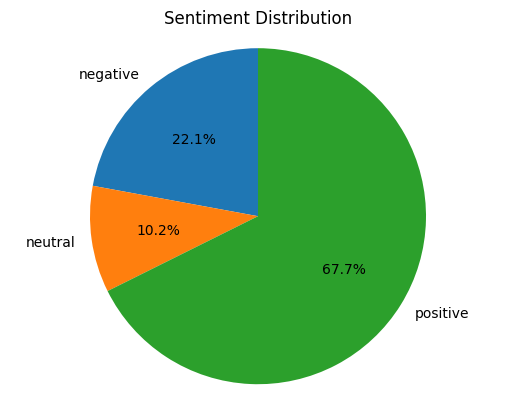

In [47]:
# prompt: create a chart in % to show positve negitive and neutral

import matplotlib.pyplot as plt

# Calculate the percentage of each label
label_counts = df.groupby('label').size()
label_percentages = (label_counts / len(df)) * 100

# Create a pie chart
plt.pie(label_percentages, labels=label_percentages.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
df["label"]= label


In [48]:
len(label)

1932

In [50]:
print(df.Reviews.isnull().sum())  # Check for missing reviews
print((df.Reviews == '').sum())   # Check for empty reviews


0
0


In [35]:
df = pd.DataFrame(result, columns=["Reviews"])


In [51]:
df = df.copy()
df["label"] = label

In [52]:
sentiment_task("Sir Umair is a wonderful teacher!")

[{'label': 'positive', 'score': 0.9837620854377747}]

In [53]:
sentiment_task("Sir Umair is a wonderful teacher!")[0]['label']

'positive'

In [54]:
sentiment_task("I am a struggling student!")

[{'label': 'negative', 'score': 0.7563021779060364}]

In [55]:
sentiment_task("I am a struggling student!")[0]['label']

'negative'

In [56]:
sentiment_task("AI is great to work on")[0]['label']

'positive'

In [57]:
sentiment_task("I am a struggling student!")

[{'label': 'negative', 'score': 0.7563021779060364}]

In [58]:
sentiment_task("I am a struggling student!")[0]['label']

'negative'

In [59]:
len(label)

1932

In [60]:
print(df.columns)

Index(['Reviews', 'label'], dtype='object')


In [61]:
#With GPU
len(label)

1932

In [63]:
!pip install top2vec
!pip install top2vec[sentence_encoders]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 38.1 MB/s eta 0:00:00


In [65]:
data = list(df.Reviews)

In [67]:
from top2vec import Top2Vec

model = Top2Vec(documents=data, speed="fast-learn", workers=8)


2024-10-26 14:52:02,319 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-10-26 14:52:02,444 - top2vec - INFO - Downloading universal-sentence-encoder-multilingual model
INFO:top2vec:Downloading universal-sentence-encoder-multilingual model
2024-10-26 14:52:10,865 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-10-26 14:52:16,846 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-10-26 14:52:39,094 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-10-26 14:52:39,155 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [70]:
model.get_num_topics()

7

In [71]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [72]:
topic_sizes

array([1043,  311,  136,  125,  122,  101,   94])

In [76]:
topic_nums

array([0, 1, 2, 3, 4, 5, 6])

In [78]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=0, num_docs=15)
for i in documents:
  print(i)
  print(" ")

Nice app Very easy transactions
 
Very good app for transaction
 
Very good account app 
 
SadaPay app is very good I am very happy to use it and it doesn't charge any money for any transaction excellent service
 
Very nice app like easy pasa
 
Very good app easy to use
 
Very good app and easily used
 
Very good no payment stuck problem a very good app
 
Very good transfer money app
 
Great app, much better transaction experience than any other banking app I have ever used
 
Best app for any transactions & any payments Very easy to use
 
I like this app very easy international transactions
 
Great app, no fee
 
Very fast transactions and useful app
 
Awesome app, way better than all banking apps
 


In [79]:
documents

array(['Nice app Very easy transactions', 'Very good app for transaction',
       'Very good account app ',
       "SadaPay app is very good I am very happy to use it and it doesn't charge any money for any transaction excellent service",
       'Very nice app like easy pasa', 'Very good app easy to use',
       'Very good app and easily used',
       'Very good no payment stuck problem a very good app',
       'Very good transfer money app',
       'Great app, much better transaction experience than any other banking app I have ever used',
       'Best app for any transactions & any payments Very easy to use',
       'I like this app very easy international transactions',
       'Great app, no fee', 'Very fast transactions and useful app',
       'Awesome app, way better than all banking apps'], dtype=object)

In [80]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=4, num_docs=15)
for i in documents:
  print(i)
  print(" ")

Very poor customer support service
 
Poor customer service
 
Pathetic service no customer support
 
Horrible customer service
 
Customer service is pathetic
 
Customer support is very poor
 
Very bad customer service
 
Not satisfactory customer support
 
Terrible and pathetic Customer service
 
Pathetic customer service
 
Worst customer service
 
Customer Support sucks.
 
Pathetic customer service and overall experience
 
Customer service could be improved
 
Nehaytt hi ghatiya customer support
 


In [86]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=2, num_docs=15)
for i in documents:
  print(i)
  print(" ")

Good experience
 
Good experience
 
Good experience
 
Good experience
 
Good experience
 
Good experience
 
Good experience
 
Good experience
 
Good experience
 
Good experience
 
Good experience
 
Good experience
 
Good experience 
 
Good experience
 
Good experience
 


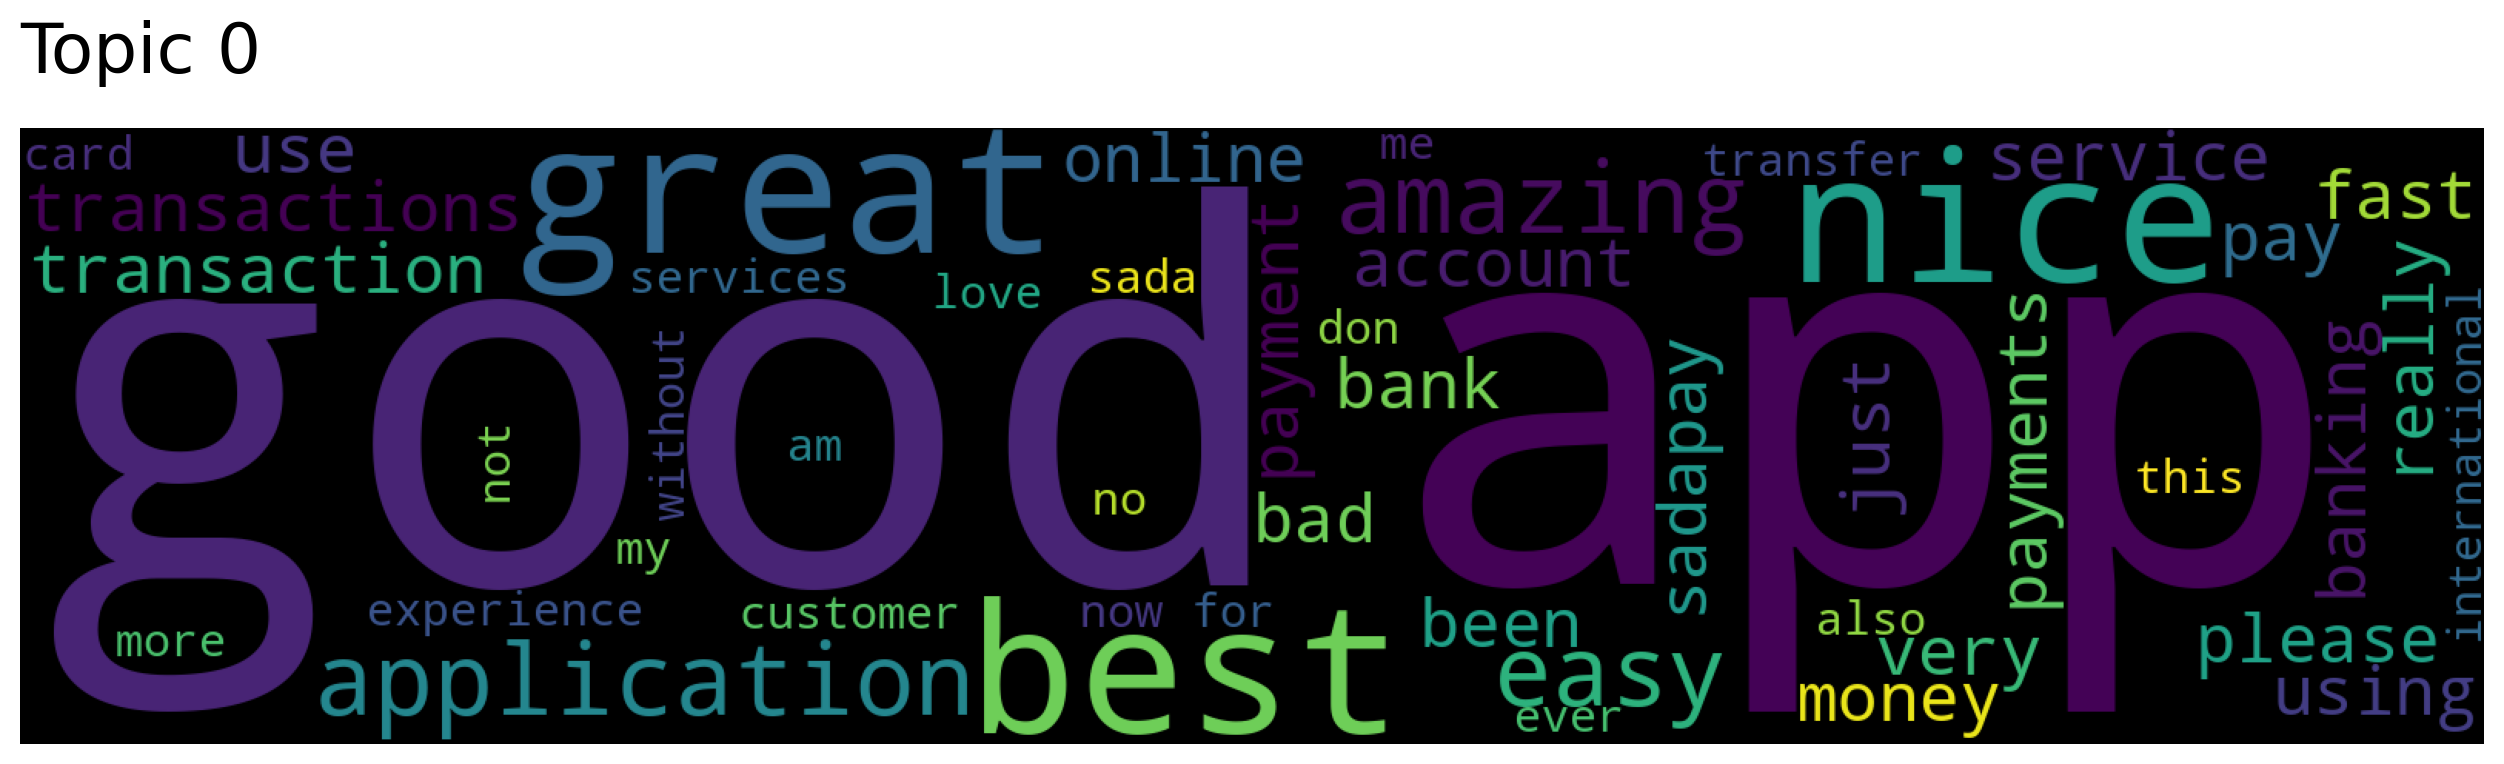

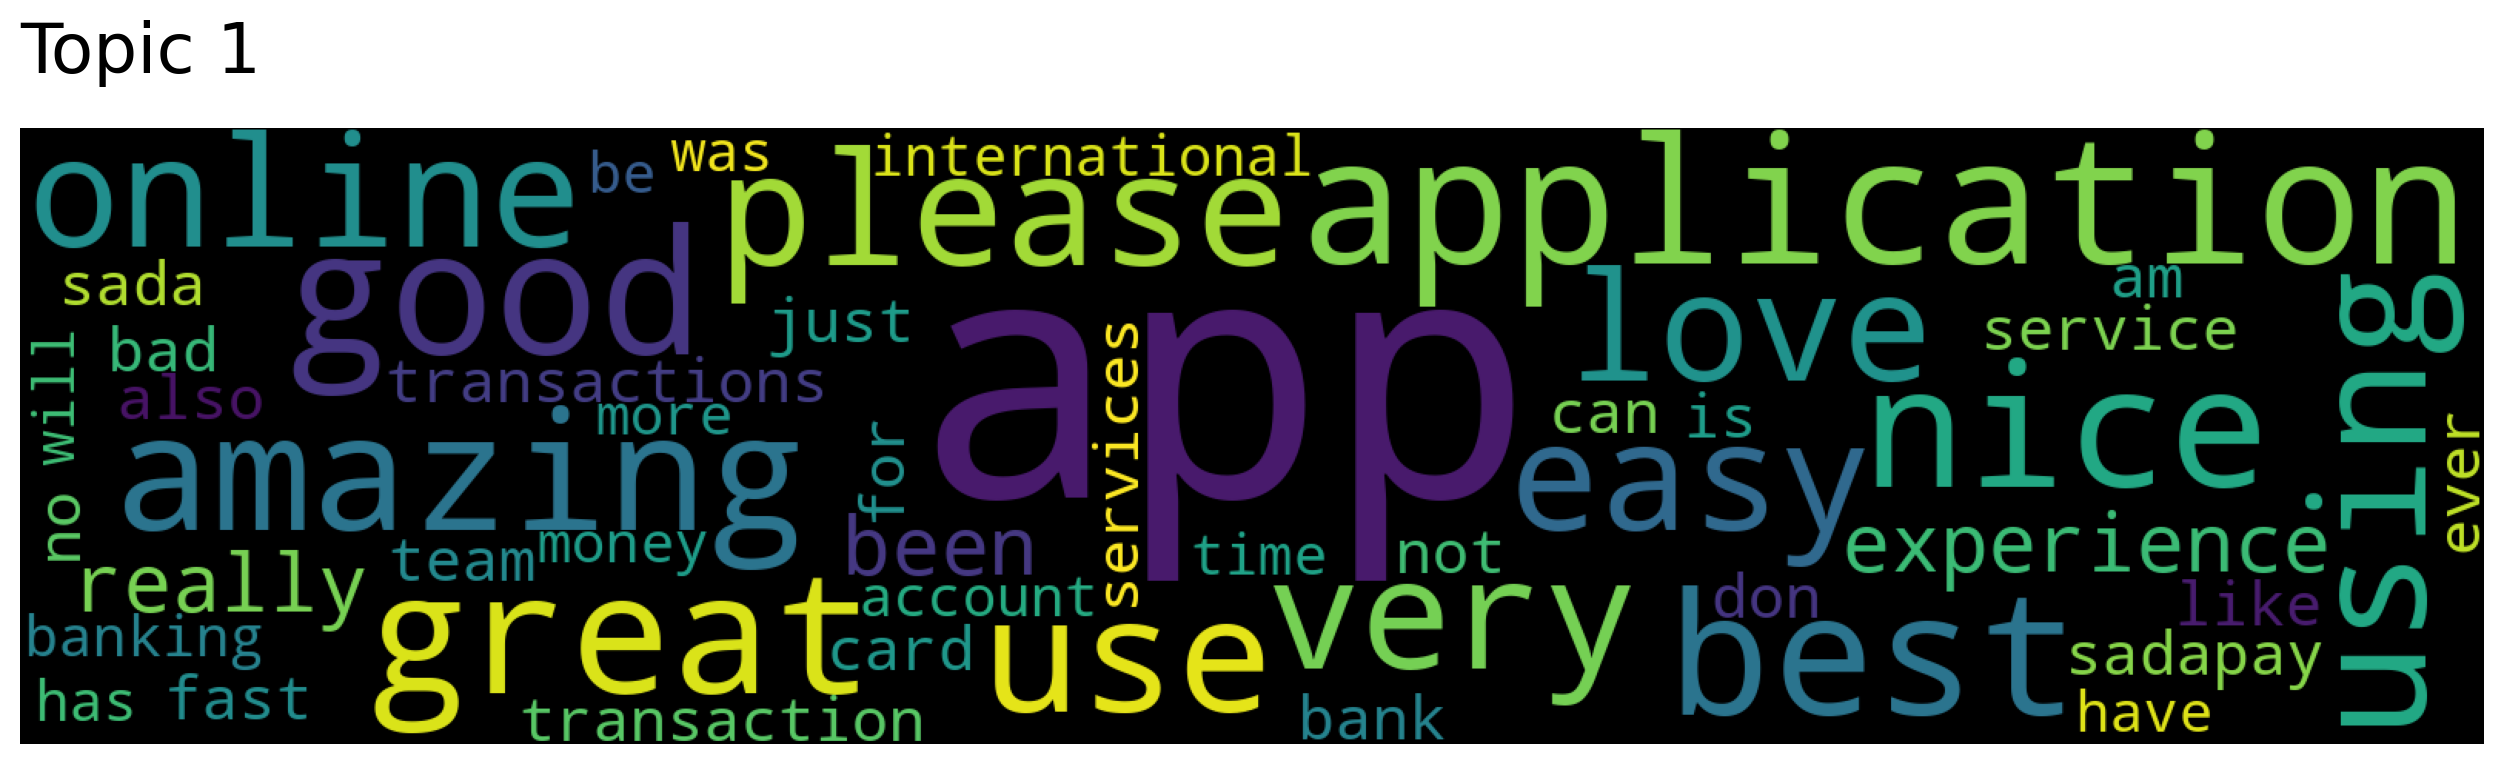

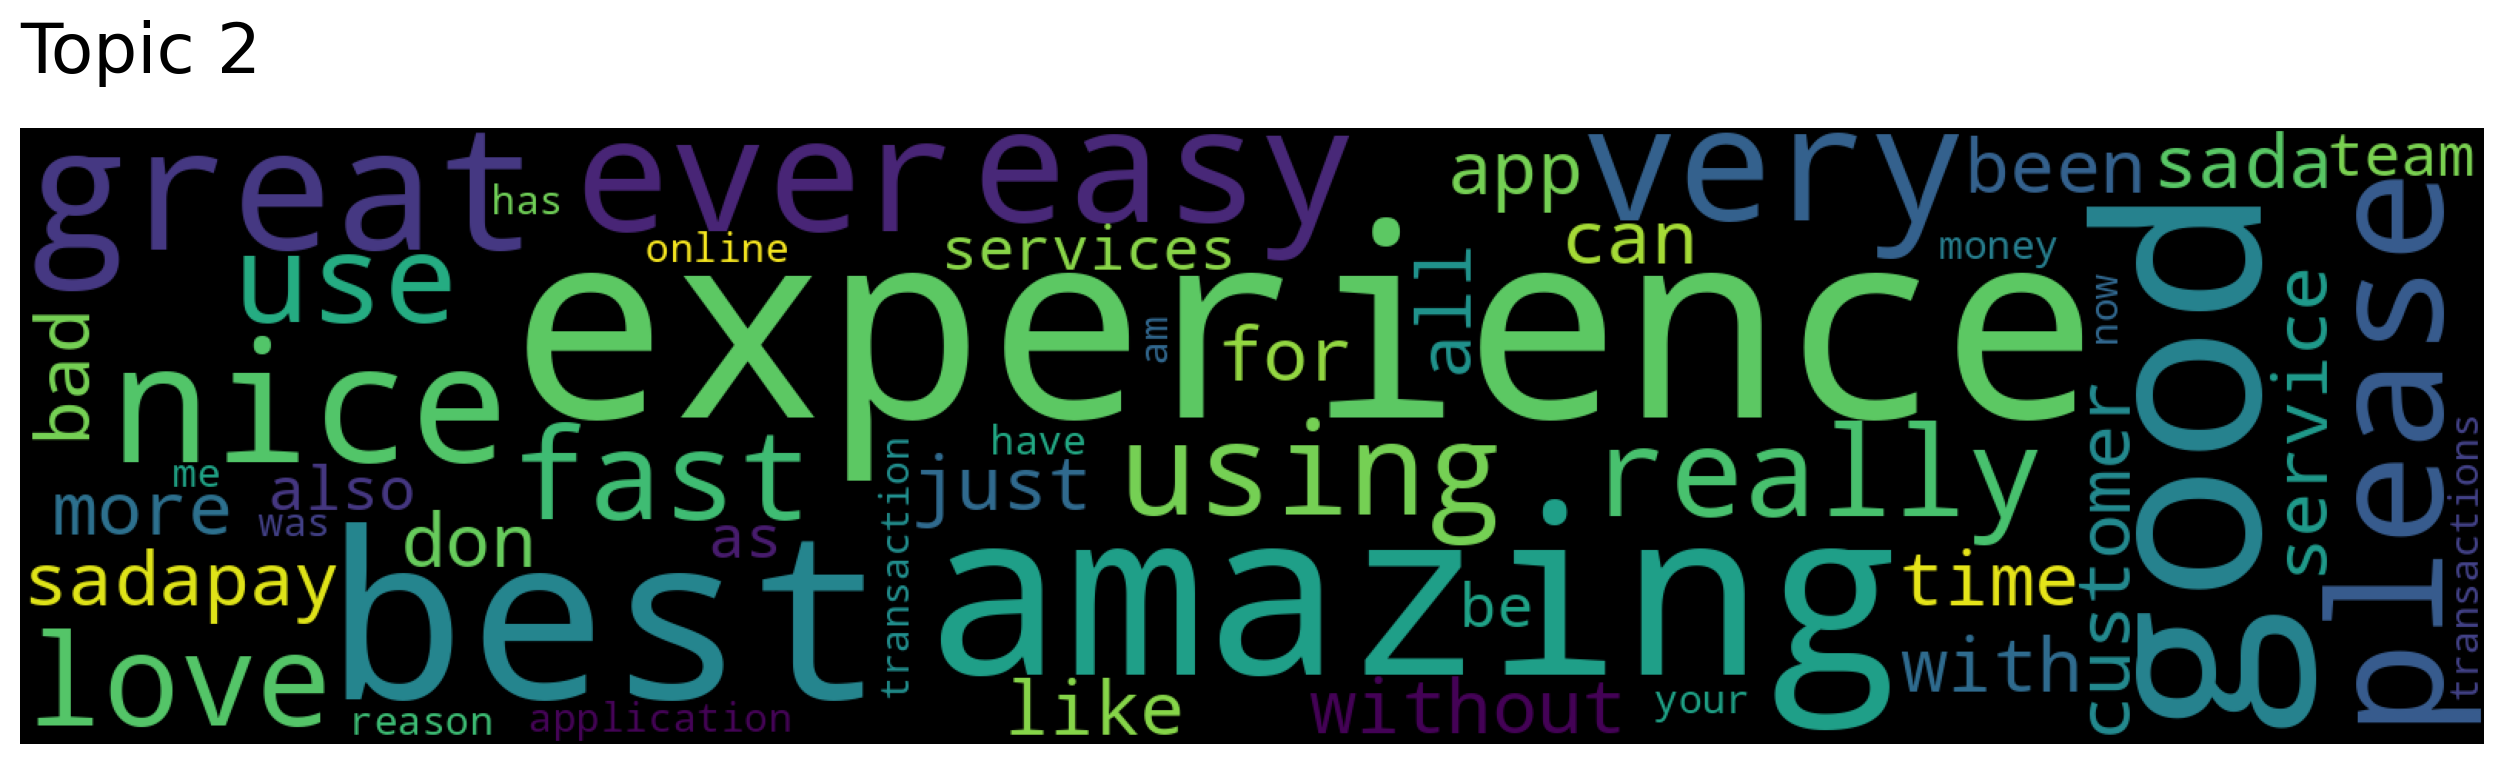

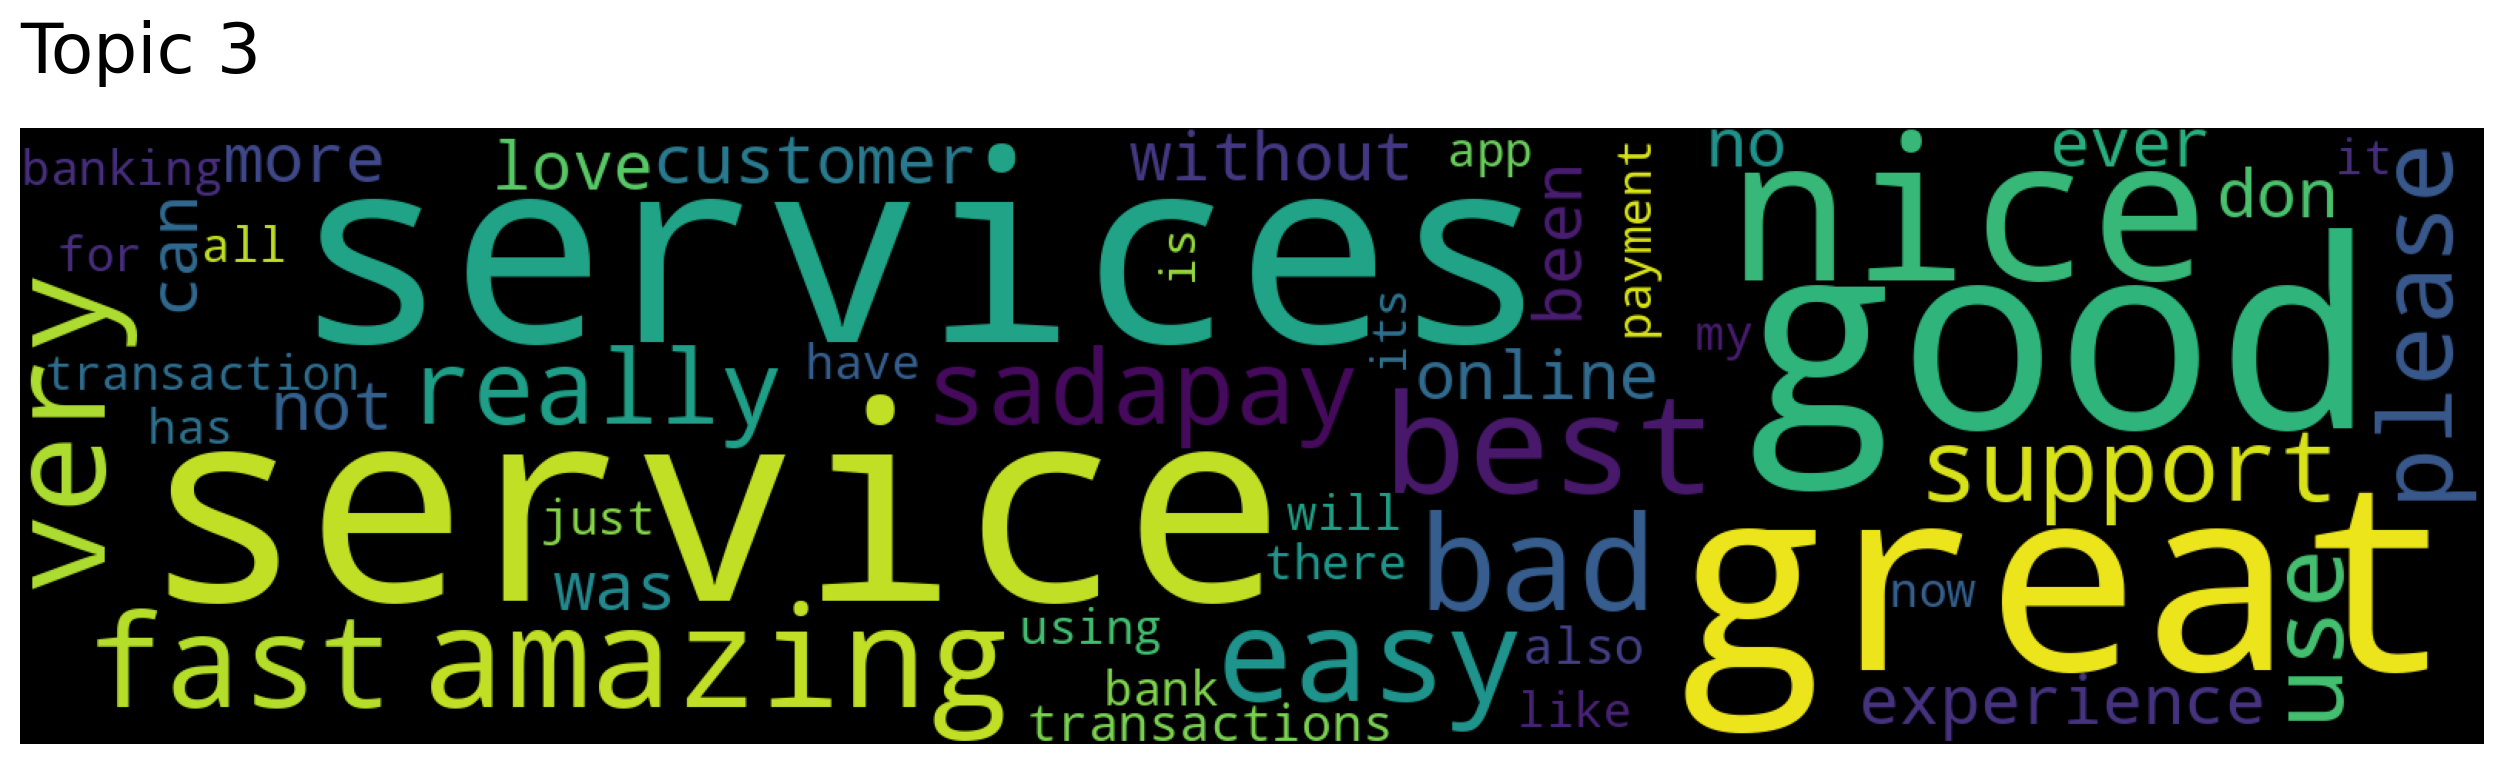

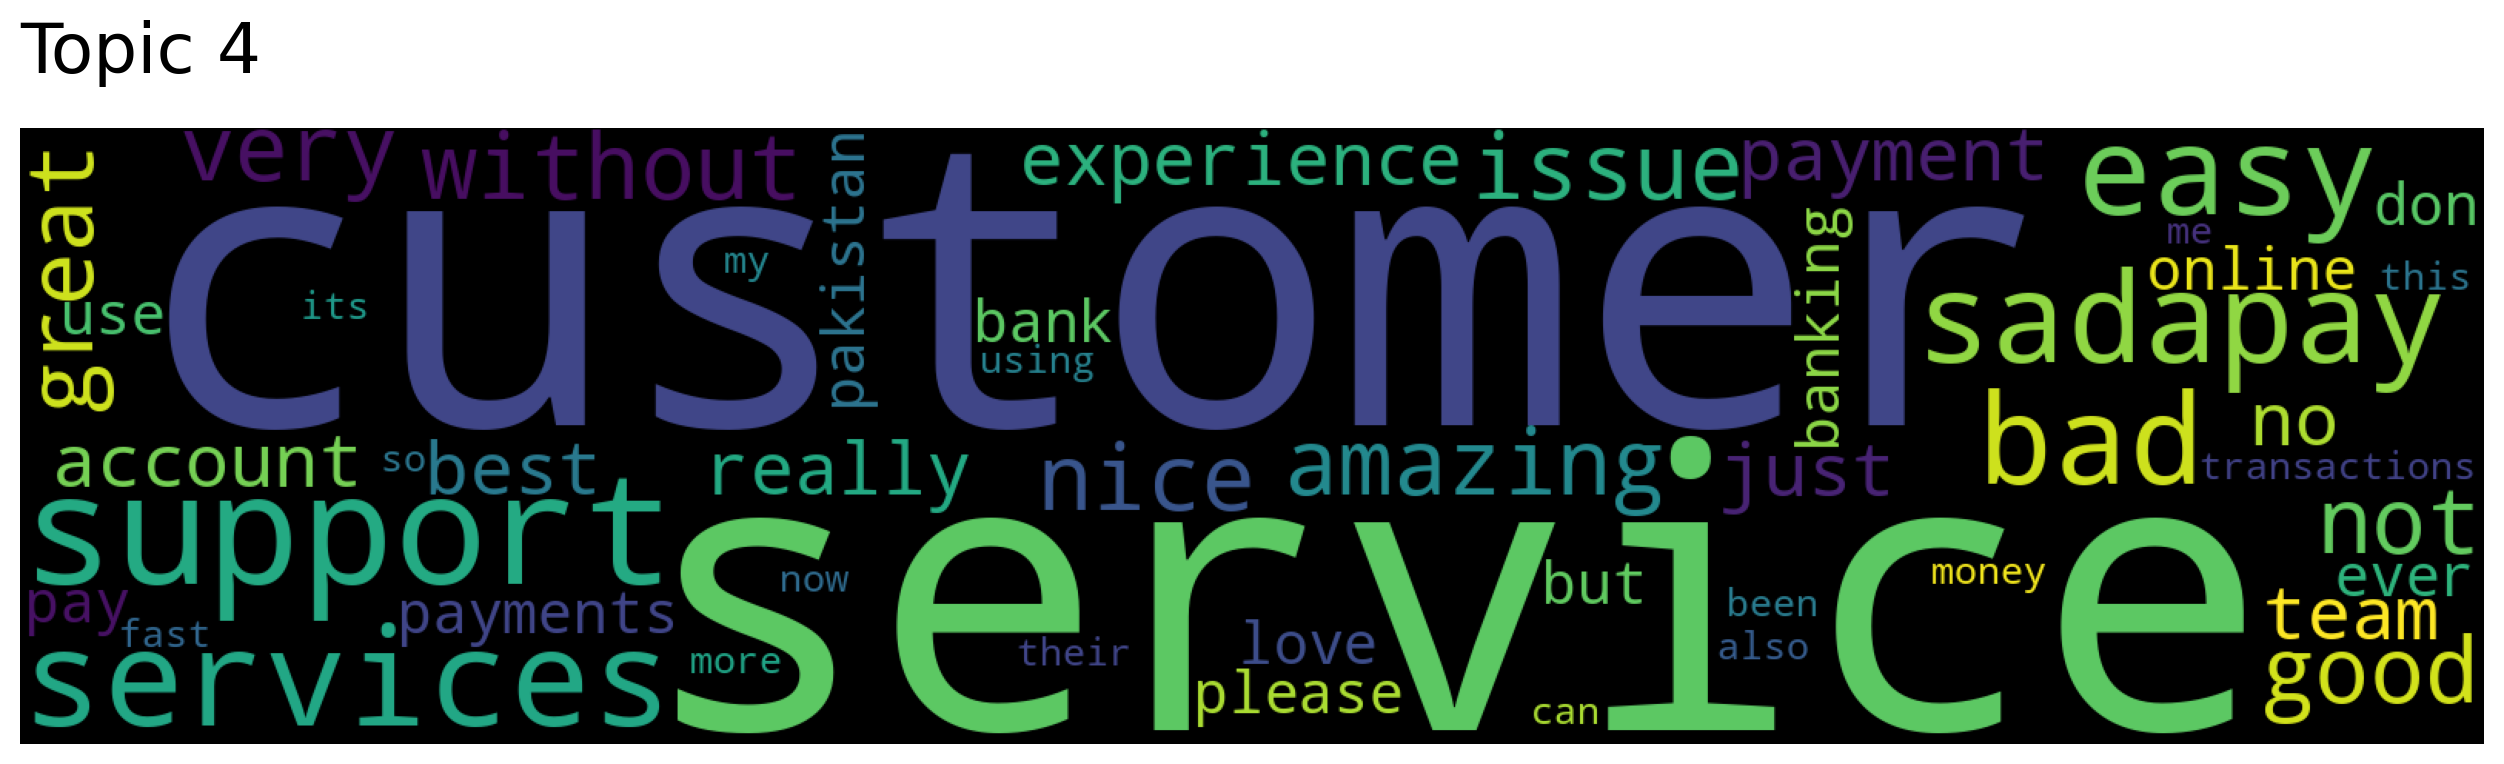

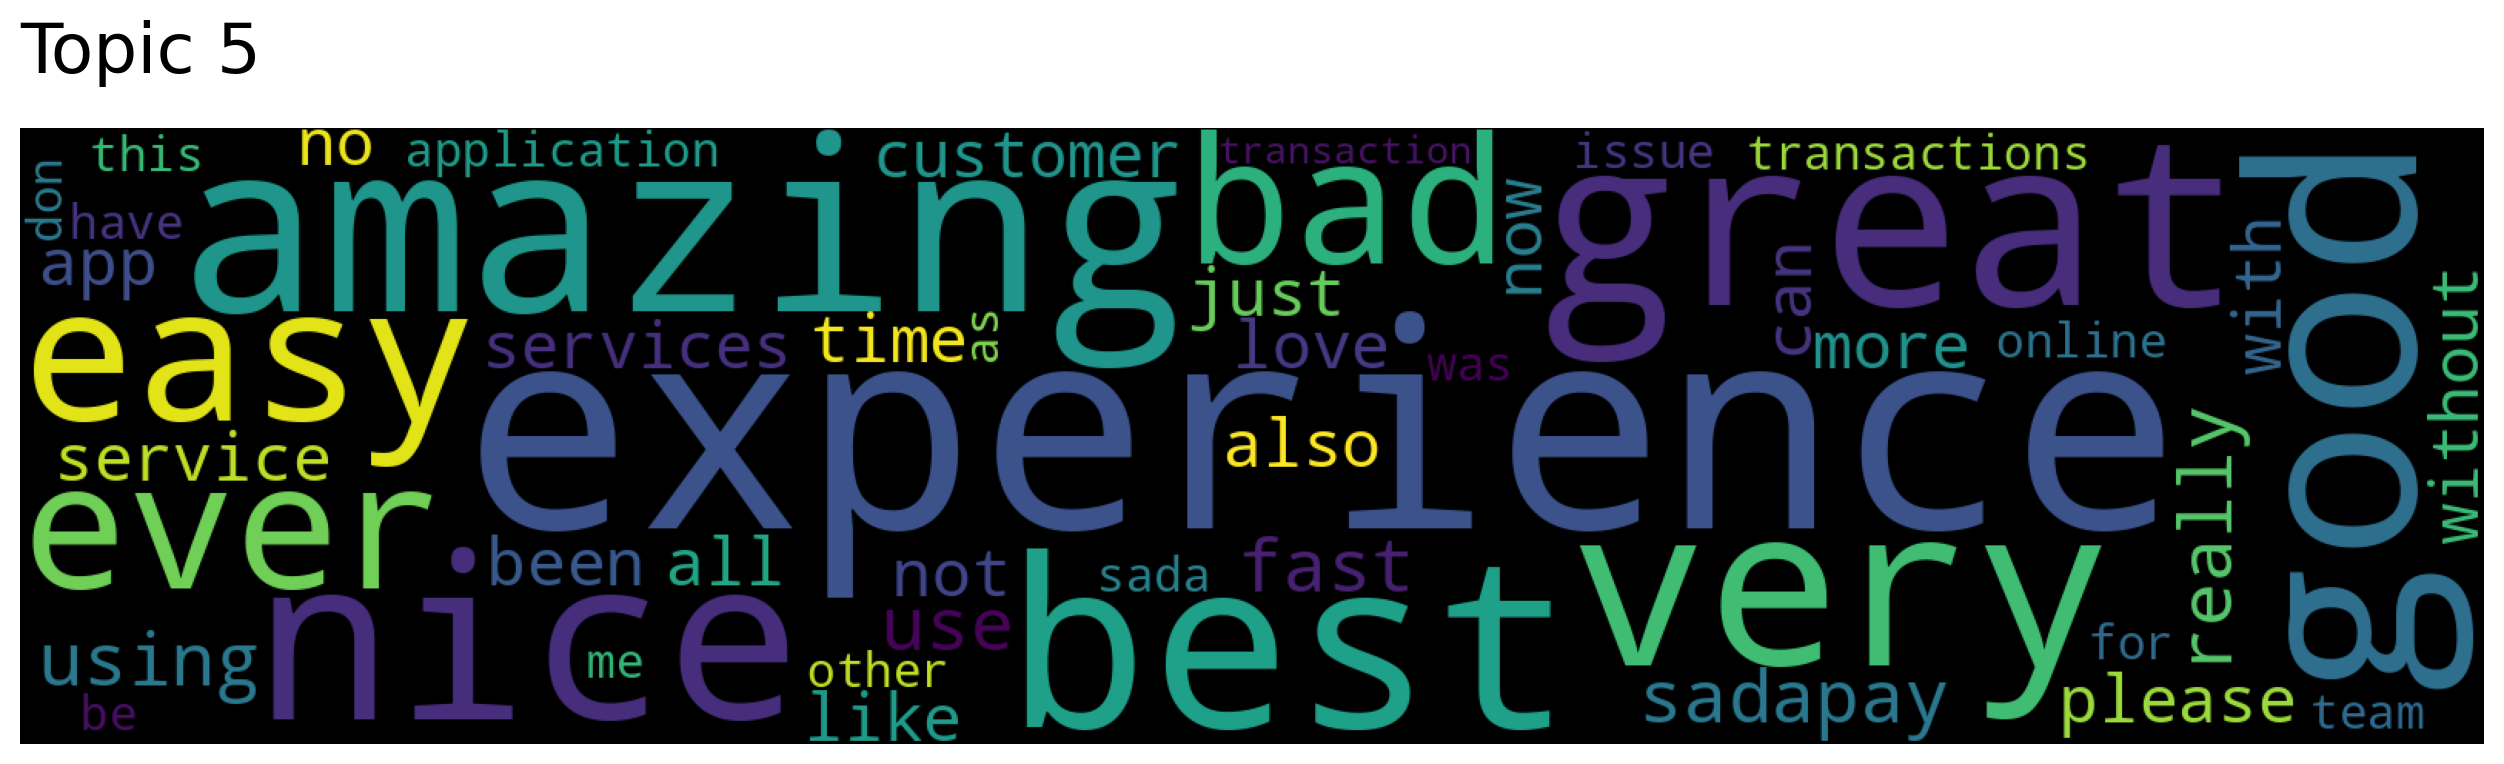

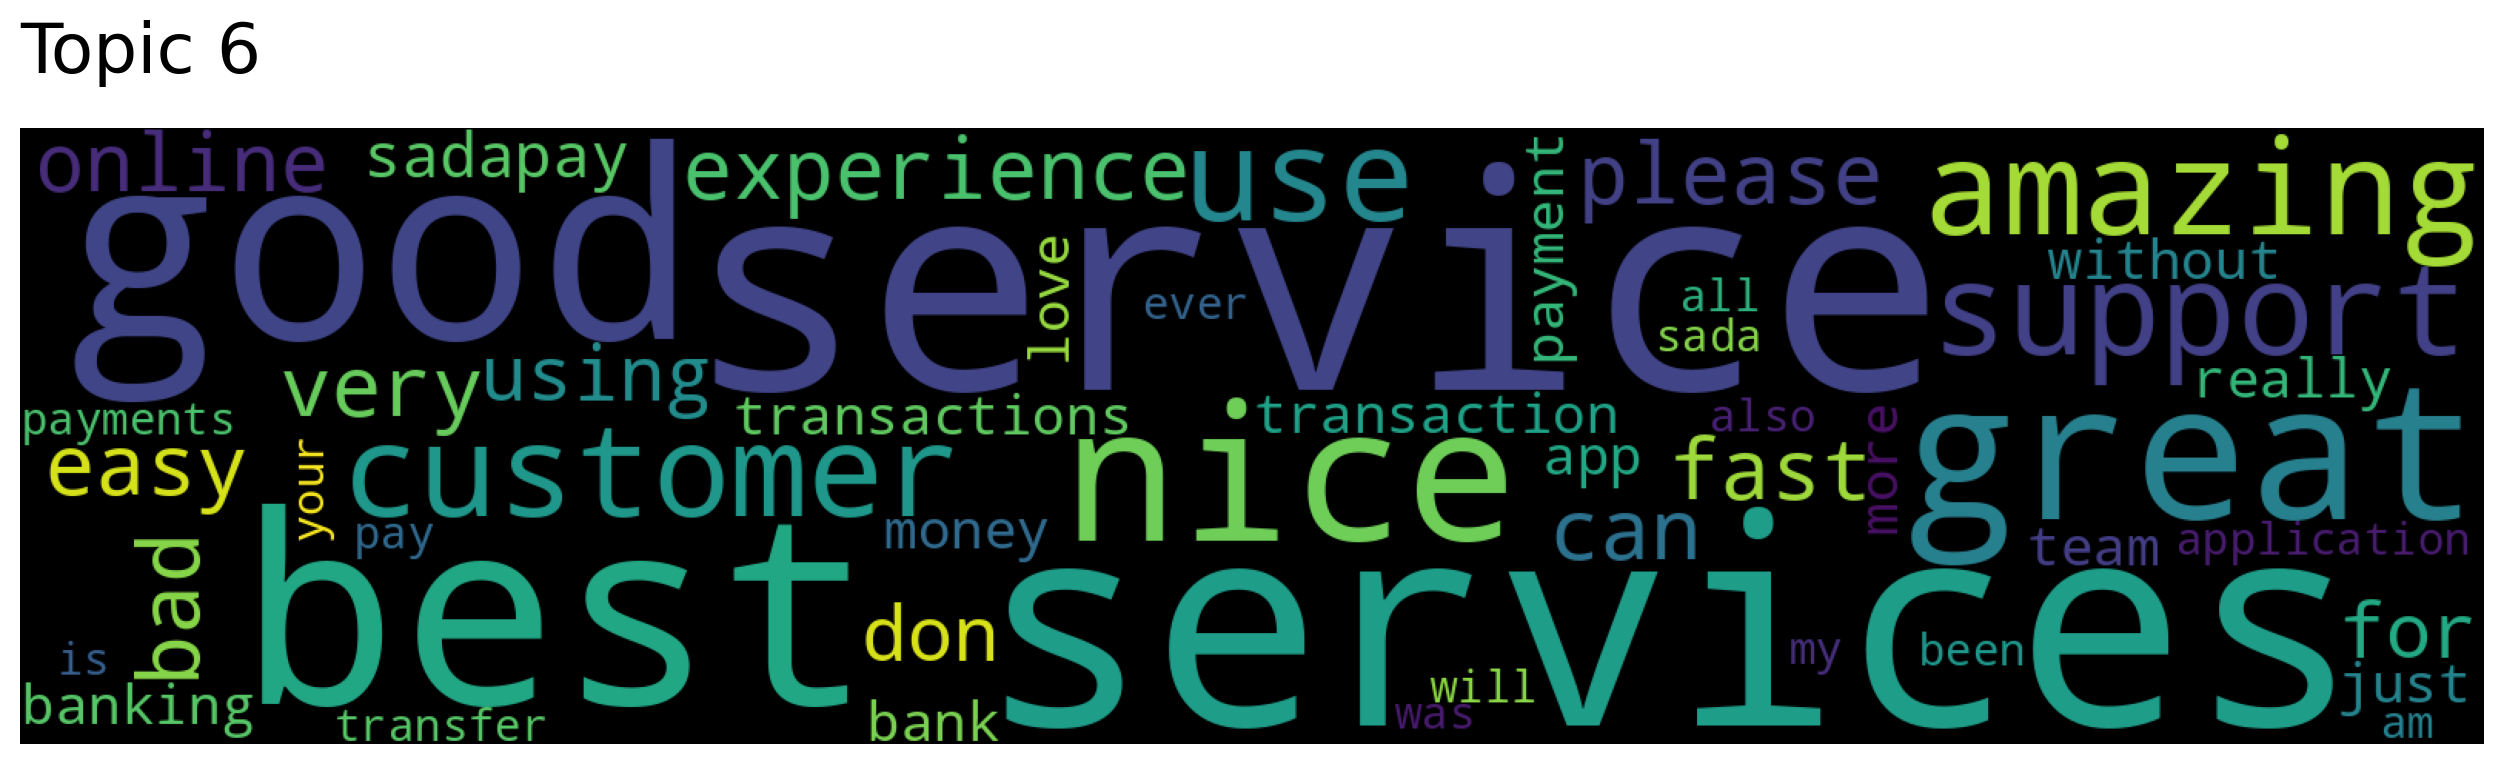

In [73]:
# Get the actual number of topics detected by the model
num_topics = model.get_num_topics()  # This will return 3 if there are only 3 topics

# Loop through the valid range of topics
for i in range(num_topics):
    model.generate_topic_wordcloud(i)


**Gradio UI for App sentiment and topic modeling**

In [75]:
from google_play_scraper import app, Sort, reviews_all
import pandas as pd

def scrape_reviews(app_id):
  # App ID (you can find this in the app's URL on the Play Store)
  #app_id = 'com.sadapay.app'  # Replace with the actual app ID
  result = []
  # Scrape reviews
  try:
      result = reviews_all(
          app_id,
          sleep_milliseconds=50,  # You might want to adjust this to avoid getting blocked
          lang='en',
          country='us',
          sort=Sort.NEWEST
      )
      print(f"Successfully scraped reviews for app: {app_id}")
  except Exception as e:
      print(f"Error scraping reviews: {e}")

  data_list = []
  for i in result:
    #print(i['content'])
    data_list.append(i['content'])

  return data_list


#Funtio to remove Emoji
def remove_emoji(text):
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  emoji_pattern.sub(r'', text)

# Assuming you have your DataFrame 'df' with a column named 'Reviews'
df = pd.DataFrame(data_list,columns=["Reviews"] )
df['Reviews'] = df['Reviews'].apply(lambda x: remove_emoji(x))
df['Reviews'] = df['Reviews'].str.replace(r'\(🤫🥰\)', '', regex=True)

# Remove rows where the 'Reviews' column is empty after cleaning
df = df[df['Reviews'].str.len() > 0]

print(df.tail(20))

In [ ]:
# prompt: create a gradio UI that allows user to input text and return the sentiment graph of the app user provided

!pip install gradio

import gradio as gr

def analyze_sentiment(text):
  """Analyzes the sentiment of the input text using the sentiment_task pipeline."""
  try:
    sentiment = sentiment_task(text)[0]['label']
    return sentiment
  except Exception as e:
    return f"Error analyzing sentiment: {e}"


iface = gr.Interface(
    fn=analyze_sentiment,
    inputs=gr.Textbox(lines=5, placeholder="Enter your text here..."),
    outputs=gr.Label(label="Sentiment"),
    title="Sentiment Analysis",
    description="Analyze the sentiment of your text using a pre-trained model.",
)

iface.launch()
